<a href="https://colab.research.google.com/github/adrita23/Machine-Learning_Assignment_2/blob/main/ML_Fall21_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fall 2021
#ML 633: Machine Learning
#Homework: 2 
#Date: October 7, 2021
#Author: Adrita Anika

In [2]:
#Question 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data
data = pd.read_csv('/content/drive/MyDrive/ML HW/hw2_data.csv') 

In [5]:
data.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,2598
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,1568


**Question 2: Machine Learning with Pokemon Go**

**i. Data exploration:** Column 8 is categorical and Column 2-Column 7 are numerical attributes of this dataset.

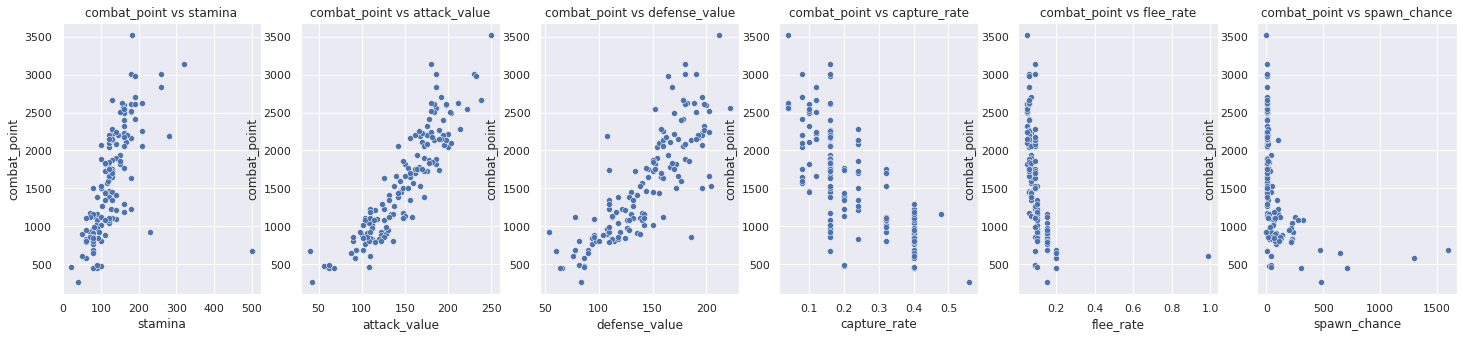

In [27]:
# ii. Plot 2D Scatter Plots
# for columns 2-6
fig, axes = plt.subplots(1, 6)
sns.set(rc = {'figure.figsize':(25,5)})

for i in range(1,7):
  sns.scatterplot(ax= axes[i-1], x=data.columns[i], y=data.columns[-1], data=data)
  axes[i-1].set_title(data.columns[-1]+ " vs "+ data.columns[i])

Text(0.5, 1.0, 'combat_point vs primary_strength')

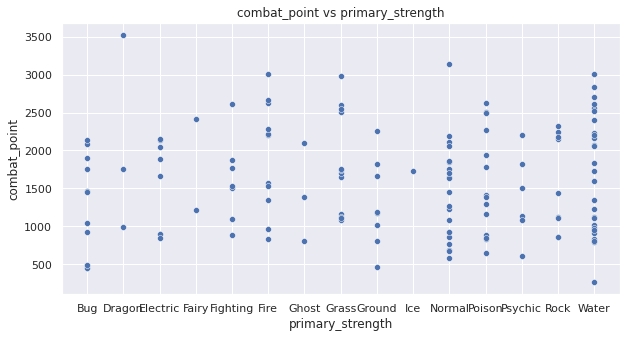

In [7]:
#for column 7
data[data.columns[-2]] = data[data.columns[-2]].astype('category')
#data.describe(include='category')
sns.set(rc = {'figure.figsize':(10,5)})
ax2 = sns.scatterplot( x=data.columns[-2], y=data.columns[-1], data=data)
ax2.set_title(data.columns[-1]+ " vs "+ data.columns[-2])

In [8]:
#calculate pearson coefficient
#pearson_r = []
from scipy import stats
for i in range(1, 7):
  #print(len(data.columns[i]), len(data.columns[-1]))
  pearson_r, p = stats.pearsonr(data[data.columns[i]], data[data.columns[-1]])
  print(f"The Pearson coefficient between {data.columns[-1]} and {data.columns[i]} are: {round(pearson_r,4)}")

The Pearson coefficient between combat_point and stamina are: 0.5828
The Pearson coefficient between combat_point and attack_value are: 0.9075
The Pearson coefficient between combat_point and defense_value are: 0.8262
The Pearson coefficient between combat_point and capture_rate are: -0.743
The Pearson coefficient between combat_point and flee_rate are: -0.407
The Pearson coefficient between combat_point and spawn_chance are: -0.4213


**ii. Data Exploration:**

In [9]:
# iii. Plot scatters plots between the features and see thier correlation

#calculate correlation matrix and plot heatmap



**iii. Data Exploration**

In [10]:
# Pre-processing of categorical values with one hot encoding

#print(data["primary_strength"].unique())
#print(data["primary_strength"].value_counts())
one_hot_encoded_data = pd.get_dummies(data, columns = ['primary_strength'])
#print(one_hot_encoded_data)

**iv Pre-processing of categorical values with one hot encoding**

In [11]:
#v. Implementing Linear Regression with Closed Form Solution
class Linear_regression:

  def __init__(self, X_train, Y_train):
    self.Y_train = Y_train
    # X_train is a N x D dimensional matrix, where N is the number of samples and D is the numebr of features 
    N, D = X_train.shape
    a = np.ones([N, 1])
    self.X_train = np.hstack((a, X_train))
    #self.w = np.random.rand(D+1, 1)

  def fit(self):
    #Ordinary least square solution
    A =  np.linalg.pinv(np.matmul((self.X_train).T, self.X_train)) 
    B = np.matmul((self.X_train).T, self.Y_train)
    self.w = np.matmul(A,B)
    #print("The number of parameters", len(self.w))

  def predict(self, X_test):
    n, D = X_test.shape
    a = np.ones([n, 1])
    X_test = np.hstack((a, X_test))
    #print("X_test_shape", X_test.shape)
    res = np.matmul(X_test, self.w)
    return res


In [12]:
Y = one_hot_encoded_data["combat_point"].to_numpy().reshape(146,1)
#print(Y.shape)
name = one_hot_encoded_data["name"].to_numpy()
one_hot_encoded_data.drop(["combat_point", "name"], axis=1, inplace=True)
X =one_hot_encoded_data.to_numpy()
#print(X.shape)
data_np = np.hstack((X,Y))

In [13]:
#Random shuff;=ling and splitting into 5 folds
X_train = {}
Y_train = {}

np.random.shuffle(data_np)
X_train[0], Y_train[0] = data_np[0:29, :-1], data_np[0:29, -1].reshape(29,1)
X_train[1], Y_train[1] = data_np[1*29: 1*29+29, :-1], data_np[1*29: 1*29+29, -1].reshape(29,1)
X_train[2], Y_train[2] = data_np[2*29: 2*29+29, :-1], data_np[2*29: 2*29+29, -1].reshape(29,1)
X_train[3], Y_train[3] = data_np[3*29: 3*29+29, :-1], data_np[3*29:3*29+29, -1].reshape(29,1)
X_train[4], Y_train[4] = data_np[4*29: , :-1], data_np[4*29: , -1].reshape(30,1)

In [14]:
#cross_validation
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred- Y_Actual))
      return np.sqrt(rss_error)

fold_RSS = []
for i in range(5):
  XTrain = np.ones([1, 21])
  YTrain = np.ones([1, 1])
  for j in range(5):
    if i!= j: 
      XTrain = np.vstack((XTrain, X_train[j]))
      YTrain = np.vstack((YTrain, Y_train[j]))
  X_test = X_train[i]
  Y_test = Y_train[i]

  LP = Linear_regression(XTrain[1: ], YTrain[1: ])
  LP.fit()
  Y_Pred = LP.predict(X_test)
  fold_RSS.append(RSS(Y_Pred, Y_test))
  
print(np.average(fold_RSS))

890.6305033245504


**v. Linear Regression and Cross Validation**

In [15]:
# With Regularization
class Linear_regression_with_l2_reg:
  
  def __init__(self, X_train, Y_train, reg_coeff):
    self.Y_train = Y_train
    # X_train is a N x D dimensional matrix, where N is the number of samples and D is the numebr of features 
    N, self.D = X_train.shape
    a = np.ones([N, 1])
    self.X_train = np.hstack((a, X_train))
    self.reg_coeff = reg_coeff

  def fit(self):
    #Ordinary least square solution
    I = self.reg_coeff * np.eye(self.D+1)
    A =  np.linalg.pinv(np.matmul((self.X_train).T, self.X_train)+I) 
    B = np.matmul((self.X_train).T, self.Y_train)
    self.w = np.matmul(A,B)
    #print("The number of parameters", len(self.w))

  def predict(self, X_test):
    n, self.D = X_test.shape
    a = np.ones([n, 1])
    X_test = np.hstack((a, X_test))
    #print("X_test_shape", X_test.shape)
    res = np.matmul(X_test, self.w)
    return res

In [16]:
#cross_validation with l2
Lambda = [5, 4.5, 4, 3.5, 3, 2.5, 2.0, 1.5, 1.00, 0.5, 0.1, 0.05, 0.01, 0.001, 1e-7, 1e-8]
def RSS(Y_Pred, Y_Actual):
      rss_error = np.sum(np.square(Y_Pred - Y_Actual))
      return np.sqrt(rss_error)

fold_RSS_reg_l2 = []
RSS_reg_coeff = []
for r in Lambda:
  for i in range(5):
    XTrain = np.ones([1, 21])
    YTrain = np.ones([1, 1])
    for j in range(5):
      if i!= j: 
        XTrain = np.vstack((XTrain, X_train[j]))
        YTrain = np.vstack((YTrain, Y_train[j]))
    X_test = X_train[i]
    Y_test = Y_train[i]

    LP2 = Linear_regression_with_l2_reg(XTrain[1: ], YTrain[1: ], r)
    LP2.fit()
    Y_Pred = LP2.predict(X_test)
    fold_RSS_reg_l2.append(RSS(Y_Pred, Y_test))
  RSS_reg_coeff.append(np.average(fold_RSS_reg_l2))


In [17]:
print(RSS_reg_coeff)
best_lambda = Lambda[RSS_reg_coeff.index(min(RSS_reg_coeff))]
print(best_lambda)

[1059.4062825350939, 1048.5727095744985, 1037.3656767825225, 1025.8008073450073, 1013.9107267300066, 1001.7524840472253, 989.416795487835, 977.0372359939214, 964.7935495633003, 952.9259081185076, 942.7849706830002, 934.916745967807, 929.9896750197566, 926.9758655777108, 924.5528039447, 922.4326399827081]
1e-08


In [18]:
#A logistic regression  model  to  classify  between  low  and  high  combat  points.
import numpy as np
from sklearn.model_selection import train_test_split

X = data_np[:, :-1]
y = data_np[:,-1]

avg = y - np.average(y)
for i in range(len(avg)):
  if avg[i]<0:
    y[i] = 0
  else:
    y[i] = 1

XL_train, XL_test, yL_train, yL_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#train the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none').fit(XL_train, yL_train)

In [20]:
#score and test the classifier
clf.predict(XL_test)
#print("The probability of the outcomes are: ")
#print(clf.predict_proba(XL_test))
print("The score of the classifier on the test set is: ")
print(clf.score(XL_test, yL_test))

The score of the classifier on the test set is: 
0.9666666666666667


**viii. Logistic regression  model  to  classify  between  low  and  high  combat  points.**

In [21]:
#A logistic  regression  model  with  regularization  to  classify  between  low and  high  combat  points

**ix. A  logistic  regression  model  with  regularization  to  classify  between  low and  high  combat  points**

In [ ]:
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = np.linspace(0.0, 10, 50)
hyperparameters = dict(C=C, penalty = penalty)
kfold = KFold(n_splits= 5)


rsearch = GridSearchCV(model, hyperparameters, cv = kfold)
rsearch.fit(XL_train, yL_train)
print(rsearch.best_params_)


In [25]:
print(rsearch.best_params_)

{'C': 0.6122448979591837, 'penalty': 'l2'}
